In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = load_digits().data
y = load_digits().target

In [3]:
def count_score(clf, data, target):
    """Returns cross validation score of classifier and writes it to the answer file"""
    score = cross_val_score(clf, X, y, cv=10).mean()
    with open("bag_randforest_answer.txt", "w") as out:
        out.write(str(score))
    return score

In [4]:
# default Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)
count_score(dt_clf, X, y)

0.82644369068414369

In [5]:
# add Bagging
bag_clf = BaggingClassifier(n_estimators=100)
bag_clf.fit(X, y)
count_score(bag_clf, X, y)

0.92711647233941219

In [6]:
# select random features in Bagging
bag2_clf = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
bag2_clf.fit(X, y)
count_score(bag2_clf, X, y)

0.93266238263155243

In [7]:
# random features in DTS
dt3_clf = DecisionTreeClassifier(max_features="sqrt")
bag3_clf = BaggingClassifier(base_estimator=dt3_clf, n_estimators=100)
bag3_clf.fit(X, y)
count_score(bag3_clf, X, y)

0.95386977750400681

In [8]:
# in the previous block we've created analog of RandomForestClassifier
# so let's check the quality
randfor_clf = RandomForestClassifier(n_estimators=100)
randfor_clf.fit(X, y)
count_score(randfor_clf, X, y)

0.9504965604236526

#### Now we'll see how the quality changes with different parameters

In [9]:
num_trees = np.arange(1, 351, 50)
scores = []
for num in num_trees:
    scores.append(count_score(RandomForestClassifier(n_estimators=num), X, y))

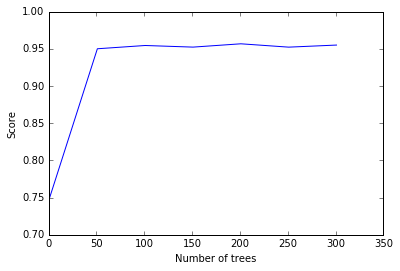

In [10]:
plt.plot(num_trees, scores)
plt.xlabel("Number of trees")
plt.ylabel("Score")

In [11]:
num_features = np.arange(1, 56, 5)
scores = []
for num in num_features:
    scores.append(count_score(RandomForestClassifier(max_features=num), X, y))

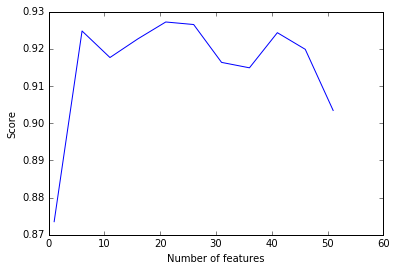

In [12]:
plt.plot(num_features, scores)
plt.xlabel("Number of features")
plt.ylabel("Score")

При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

In [13]:
max_depth = np.arange(1, 20)
scores = []
for num in max_depth:
    scores.append(count_score(RandomForestClassifier(max_depth=num), X, y))

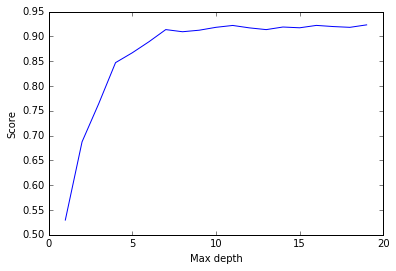

In [14]:
plt.plot(max_depth, scores)
plt.xlabel("Max depth")
plt.ylabel("Score")

При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Last question answers: 2 3 4 7